In [73]:
library(dplyr)

In [74]:
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree

In [75]:
Fdata<-read.csv("./movies2/mainData.csv", fileEncoding="utf-8");head(Fdata,2)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,스크린점유율,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,23.79760,6.50,4.00,3,10,9,TRUE,FALSE,FALSE,FALSE
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,48.26242,14.75,8.25,2,10,8,TRUE,FALSE,FALSE,FALSE


In [76]:
unique(Fdata$배급사)

[1] 롯데쇼핑㈜롯데엔터테인먼트                 
 [2] 롯데컬처웍스(주)롯데엔터테인먼트           
 [3] 아이러브시네마                             
 [4] CJ ENM,(주)시네마서비스                    
 [5] (주)쇼박스                                 
 [6] (주)시네마서비스                           
 [7] CJ ENM                                     
 [8] (주)와우픽쳐스                             
 [9] 워너브러더스 코리아(주)                    
[10] (주)넥스트엔터테인먼트월드(NEW)            
[11] 롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스
[12] (주)에이스메이커무비웍스,(주)키위미디어그룹
[13] (주)싸이더스                               
[14] 롯데쇼핑㈜롯데엔터테인먼트,(주)싸이더스    
[15] (주)씨제이이엔엠,(주)덱스터스튜디오        
[16] 이십세기폭스코리아(주)                     
[17] 메가박스중앙(주)플러스엠,(주)키위미디어그룹
17 Levels: (주)넥스트엔터테인먼트월드(NEW) (주)쇼박스 ... 이십세기폭스코리아(주)

In [77]:
Fdata1<-Fdata

In [78]:
class(Fdata1$배급사)
Fdata1$배급사<-as.character(Fdata1$배급사)

[1] "factor"

In [79]:
strsplit(Fdata1$배급사[1] , ",")

[[1]]
[1] "롯데쇼핑㈜롯데엔터테인먼트"

In [80]:
for(i in 1:nrow(Fdata1)){
     Fdata1$배급사[i]<- unlist(strsplit(Fdata1$배급사[i] , ","))[1]
   
    }

head(Fdata1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,스크린점유율,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,23.79760,6.50000,4.000000,3.000000,10,9,TRUE,FALSE,FALSE,FALSE
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,48.26242,14.75000,8.250000,2.000000,10,8,TRUE,FALSE,FALSE,FALSE
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,36.90476,10.50000,4.000000,2.333333,10,8,FALSE,TRUE,FALSE,FALSE
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,35.27944,10.63492,6.777778,3.571429,10,9,FALSE,TRUE,FALSE,FALSE
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,21.64329,17.66667,7.666667,3.500000,10,9,FALSE,TRUE,FALSE,FALSE
건축학개론,30223590400,4111237,593,106069,2012-03-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,28.49592,16.75000,6.500000,3.500000,20,10,TRUE,FALSE,FALSE,FALSE


In [81]:
Fdata1$배급사[Fdata1$배급사 == "롯데쇼핑㈜롯데엔터테인먼트"] <- "(주)롯데엔터테인먼트"
Fdata1$배급사[Fdata1$배급사 == "롯데컬처웍스(주)롯데엔터테인먼트"] <- "(주)롯데엔터테인먼트"
Fdata1$배급사[Fdata1$배급사 == "(주)씨제이이엔엠"] <- "CJ ENM"

In [82]:
 distributor<-Fdata1[,7]; distributor

[1] "(주)롯데엔터테인먼트"            "(주)롯데엔터테인먼트"           
  [3] "아이러브시네마"                  "CJ ENM"                         
  [5] "(주)쇼박스"                      "(주)롯데엔터테인먼트"           
  [7] "(주)시네마서비스"                "CJ ENM"                         
  [9] "(주)와우픽쳐스"                  "CJ ENM"                         
 [11] "(주)쇼박스"                      "(주)쇼박스"                     
 [13] "CJ ENM"                          "CJ ENM"                         
 [15] "(주)쇼박스"                      "워너브러더스 코리아(주)"        
 [17] "(주)쇼박스"                      "(주)쇼박스"                     
 [19] "(주)넥스트엔터테인먼트월드(NEW)" "(주)넥스트엔터테인먼트월드(NEW)"
 [21] "CJ ENM"                          "CJ ENM"                         
 [23] "(주)쇼박스"                      "(주)쇼박스"                     
 [25] "CJ ENM"                          "(주)롯데엔터테인먼트"           
 [27] "(주)에이스메이커무비웍스"        "(주)쇼박스"                     
 [29] "(주)롯데엔터테인먼트"            "CJ ENM"                         
 [31] "(주)쇼박스"                      "(주)싸이더스"                   
 [33] "CJ ENM"                          "(주)쇼박스"                     
 [35] "CJ ENM"                          "CJ ENM"                         
 [37] "(주)롯데엔터테인먼트"            "CJ ENM"                         
 [39] "CJ ENM"                          "(주)롯데엔터테인먼트"           
 [41] "CJ ENM"                          "CJ ENM"                         
 [43] "(주)넥스트엔터테인먼트월드(NEW)" "(주)쇼박스"                     
 [45] "(주)넥스트엔터테인먼트월드(NEW)" "(주)넥스트엔터테인먼트월드(NEW)"
 [47] "CJ ENM"                          "CJ ENM"                         
 [49] "(주)쇼박스"                      "CJ ENM"                         
 [51] "(주)넥스트엔터테인먼트월드(NEW)" "(주)넥스트엔터테인먼트월드(NEW)"
 [53] "(주)롯데엔터테인먼트"            "(주)롯데엔터테인먼트"           
 [55] "CJ ENM"                          "(주)넥스트엔터테인먼트월드(NEW)"
 [57] "(주)쇼박스"                      "(주)넥스트엔터테인먼트월드(NEW)"
 [59] "CJ ENM"                          "(주)쇼박스"                     
 [61] "(주)쇼박스"                      "(주)쇼박스"                     
 [63] "(주)넥스트엔터테인먼트월드(NEW)" "(주)넥스트엔터테인먼트월드(NEW)"
 [65] "CJ ENM"                          "(주)넥스트엔터테인먼트월드(NEW)"
 [67] "CJ ENM"                          "(주)넥스트엔터테인먼트월드(NEW)"
 [69] "CJ ENM"                          "(주)롯데엔터테인먼트"           
 [71] "(주)쇼박스"                      "(주)쇼박스"                     
 [73] "CJ ENM"                          "(주)쇼박스"                     
 [75] "(주)롯데엔터테인먼트"            "(주)쇼박스"                     
 [77] "CJ ENM"                          "CJ ENM"                         
 [79] "CJ ENM"                          "(주)넥스트엔터테인먼트월드(NEW)"
 [81] "CJ ENM"                          "(주)쇼박스"                     
 [83] "이십세기폭스코리아(주)"          "CJ ENM"                         
 [85] "(주)롯데엔터테인먼트"            "(주)쇼박스"                     
 [87] "(주)쇼박스"                      "CJ ENM"                         
 [89] "(주)쇼박스"                      "CJ ENM"                         
 [91] "(주)쇼박스"                      "(주)쇼박스"                     
 [93] "CJ ENM"                          "워너브러더스 코리아(주)"        
 [95] "메가박스중앙(주)플러스엠"        "CJ ENM"                         
 [97] "CJ ENM"                          "CJ ENM"                         
 [99] "CJ ENM"                          "CJ ENM"                         
[101] "(주)쇼박스"                      "CJ ENM"                         
[103] "CJ ENM"                          "(주)롯데엔터테인먼트"           
[105] "(주)쇼박스"                      "(주)롯데엔터테인먼트"           
[107] "CJ ENM"                          "CJ ENM"

[1] "character"

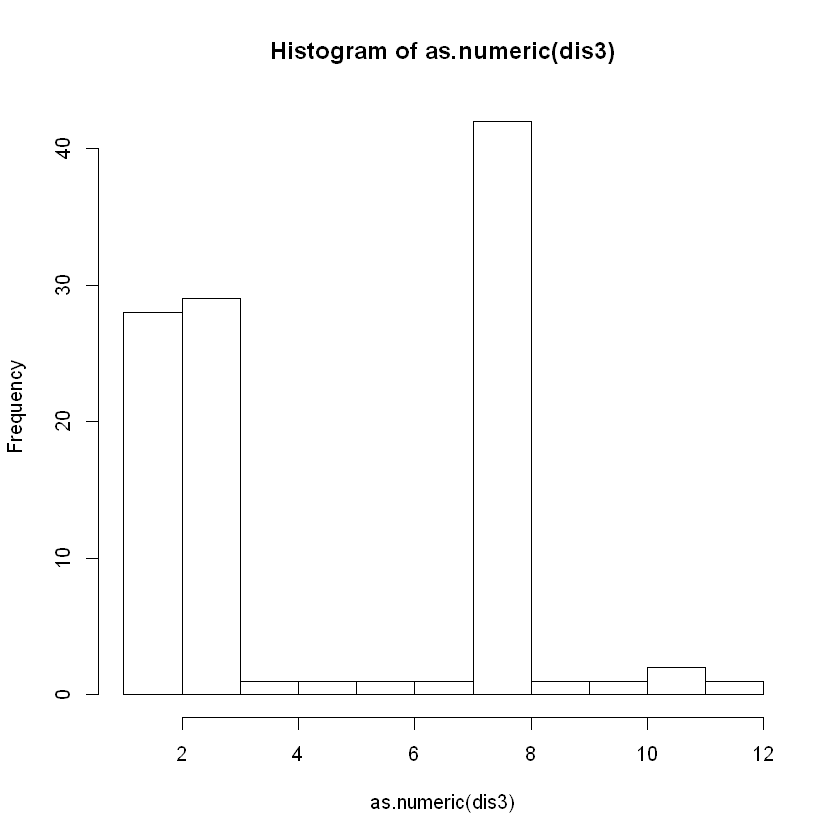

In [149]:
class(distributor)
dis3 <-as.factor(distributor)
hist(as.numeric(dis3))

In [83]:
table(distributor)

distributor
(주)넥스트엔터테인먼트월드(NEW)            (주)롯데엔터테인먼트 
                             14                              14 
                     (주)쇼박스                (주)시네마서비스 
                             29                               1 
                   (주)싸이더스        (주)에이스메이커무비웍스 
                              1                               1 
                 (주)와우픽쳐스                          CJ ENM 
                              1                              42 
       메가박스중앙(주)플러스엠                  아이러브시네마 
                              1                               1 
        워너브러더스 코리아(주)          이십세기폭스코리아(주) 
                              2                               1 

In [84]:
distributor1<-as.data.frame(table(distributor));distributor1

distributor,Freq
(주)넥스트엔터테인먼트월드(NEW),14
(주)롯데엔터테인먼트,14
(주)쇼박스,29
(주)시네마서비스,1
(주)싸이더스,1
(주)에이스메이커무비웍스,1
(주)와우픽쳐스,1
CJ ENM,42
메가박스중앙(주)플러스엠,1
아이러브시네마,1


In [85]:
class(distributor1$Freq)

[1] "integer"

In [119]:
Fdata1$배급사점수<-0
i <- 0

    for(i in 1:nrow(Fdata1)){
        if(Fdata1$배급사[i] %in% c("(주)시네마서비스","(주)싸이더스","(주)에이스메이커무비웍스","(주)와우픽쳐스","메가박스중앙(주)플러스엠","아이러브시네마","이십세기폭스코리아(주)","워너브러더스 코리아(주)") 
        ){Fdata1$배급사점수[i]<-1}
        
        if(Fdata1$배급사[i] %in% c("(주)넥스트엔터테인먼트월드(NEW)","(주)롯데엔터테인먼트")
          ){Fdata1$배급사점수[i]<-2}
        
        if(Fdata1$배급사[i] %in% c("(주)쇼박스","CJ ENM")
          ){Fdata1$배급사점수[i]<-4}
        
}
#점수를 각각이 아닌 묶어서 준는 이유 분포가 작으면 가진값이 그 그간을 대표하지 못한다.
#for(){if(나누기로해서 나머지기준으로 분리해보기){}}

In [120]:
Fdata1

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,6.50000,4.000000,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,2
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,14.75000,8.250000,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,2
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,10.50000,4.000000,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,1
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,10.63492,6.777778,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,4
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,17.66667,7.666667,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,4
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,16.75000,6.500000,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,2
공공의 적 2,20091127000,3134421,299,40642,2005-01-27,(주)시네마서비스,15세관람가,드라마,강우석,...,13.27778,6.777778,3.571429,10,12,FALSE,TRUE,FALSE,FALSE,1
국가부도의 날,30893315837,3755233,1180,101077,2018-11-28,CJ ENM,12세이상관람가,드라마,최국희,...,36.41667,11.750000,1.500000,10,9,TRUE,FALSE,FALSE,FALSE,4
귀향,27249801990,3587182,876,90288,2016-02-24,(주)와우픽쳐스,15세이상관람가,드라마,조정래,...,44.00000,4.000000,4.000000,10,9,FALSE,TRUE,FALSE,FALSE,1
그것만이 내 세상,27456797382,3420172,956,95437,2018-01-17,CJ ENM,12세이상관람가,"코미디,드라마",최성현,...,15.62500,11.375000,4.000000,10,9,TRUE,FALSE,FALSE,FALSE,4


In [121]:
배급사점수<-Fdata1$배급사점수;배급사점수

[1] 2 2 1 4 4 2 1 4 1 4 4 4 4 4 4 1 4 4 2 2 4 4 4 4 4 2 1 4 2 4 4 1 4 4 4 4 2
 [38] 4 4 2 4 4 2 4 2 2 4 4 4 4 2 2 2 2 4 2 4 2 4 4 4 4 2 2 4 2 4 2 4 2 4 4 4 4
 [75] 2 4 4 4 4 2 4 4 1 4 2 4 4 4 4 4 4 4 4 1 1 4 4 4 4 4 4 4 4 2 4 2 4 4

In [122]:
class(배급사점수)

[1] "numeric"

In [123]:
# fianl 데이터셋 가지고오기

In [124]:
first<-read.csv("./movies2/MLData.csv", fileEncoding="utf-8");first

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수
1,3,23.79760,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,4.000000,4039891
1,8,48.26242,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,8.250000,3678156
1,0,36.90476,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,4.000000,3117859
1,3,35.27944,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,6.777778,4313101
1,0,21.64329,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,7.666667,3024666
1,6,28.49592,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,6.500000,4111237
1,1,18.14320,3.571429,10,12,FALSE,TRUE,FALSE,FALSE,6.777778,3134421
1,5,40.17705,1.500000,10,9,TRUE,FALSE,FALSE,FALSE,11.750000,3755233
1,7,34.01942,4.000000,10,9,FALSE,TRUE,FALSE,FALSE,4.000000,3587182
1,4,32.55022,4.000000,10,9,TRUE,FALSE,FALSE,FALSE,11.375000,3420172


In [125]:
first1<-first

In [126]:
first1$cluster<-as.factor(first1$cluster)

In [127]:
a<-first1[,c(1:5,11)];a

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수
1,3,23.79760,3.000000,10,4.000000
1,8,48.26242,2.000000,10,8.250000
1,0,36.90476,2.333333,10,4.000000
1,3,35.27944,3.571429,10,6.777778
1,0,21.64329,3.500000,10,7.666667
1,6,28.49592,3.500000,20,6.500000
1,1,18.14320,3.571429,10,6.777778
1,5,40.17705,1.500000,10,11.750000
1,7,34.01942,4.000000,10,4.000000
1,4,32.55022,4.000000,10,11.375000


In [128]:
b<-a
b<-arrange(b,배우점수);b

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수
1,3,23.79760,3.000000,10,4.000000
1,0,36.90476,2.333333,10,4.000000
1,7,34.01942,4.000000,10,4.000000
1,7,29.19162,4.000000,20,4.000000
1,7,20.85828,2.250000,10,4.000000
1,1,26.03850,3.000000,10,4.000000
1,6,37.04443,4.250000,10,4.000000
2,3,39.84093,3.500000,20,4.666667
2,4,21.29854,2.833333,10,5.000000
2,4,25.01248,3.750000,20,5.000000


In [129]:
c<-a

In [130]:
c$배급사점수<-배급사점수

In [131]:
c<-arrange(c,배급사점수);c

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수
1,0,36.90476,2.333333,10,4.000000,1
1,1,18.14320,3.571429,10,6.777778,1
1,7,34.01942,4.000000,10,4.000000,1
1,0,38.03201,2.600000,10,10.000000,1
1,5,42.44885,1.500000,10,9.666667,1
1,7,20.85828,2.250000,10,4.000000,1
3,10,57.66990,4.666667,10,16.000000,1
3,7,56.07767,3.500000,20,15.818182,1
3,5,47.54158,5.000000,10,9.200000,1
1,3,23.79760,3.000000,10,4.000000,2


In [132]:
#1.감독점수,배우점수 제곱

# a<-apply(a,1,sum)
# a<-as.data.frame(a);a
# a<-sqrt(a);a

In [133]:
#2.감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수  
b

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수
1,3,23.79760,3.000000,10,4.000000
1,0,36.90476,2.333333,10,4.000000
1,7,34.01942,4.000000,10,4.000000
1,7,29.19162,4.000000,20,4.000000
1,7,20.85828,2.250000,10,4.000000
1,1,26.03850,3.000000,10,4.000000
1,6,37.04443,4.250000,10,4.000000
2,3,39.84093,3.500000,20,4.666667
2,4,21.29854,2.833333,10,5.000000
2,4,25.01248,3.750000,20,5.000000


In [134]:
# 3.감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수  
c

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수
1,0,36.90476,2.333333,10,4.000000,1
1,1,18.14320,3.571429,10,6.777778,1
1,7,34.01942,4.000000,10,4.000000,1
1,0,38.03201,2.600000,10,10.000000,1
1,5,42.44885,1.500000,10,9.666667,1
1,7,20.85828,2.250000,10,4.000000,1
3,10,57.66990,4.666667,10,16.000000,1
3,7,56.07767,3.500000,20,15.818182,1
3,5,47.54158,5.000000,10,9.200000,1
1,3,23.79760,3.000000,10,4.000000,2


In [135]:
for( i in 1:nrow(first1)){
    for(j in 1:nrow(c)){
        if(first1$스크린점유율[i] == c$스크린점유율[j]){
            first1$배급사점수[i] = c$배급사점수[j]
        }
        
    }
}


In [136]:
table(first1$배급사점수)


 1  2  4 
 9 28 71 

In [137]:
cor(as.numeric(first1$cluster),first1$배급사점수)

[1] 0.1215717

In [138]:
# first1$제곱<-a$a   #1.감독점수,배우점수 제곱

In [139]:
# 인공 신경망
f.nnet <- function(data.tr, x, y) {
    model.nnet <- nnet(cluster ~ ., data=data.tr, size = 5) 
    pred <- predict(model.nnet, x, type="class")
    return (mean(pred == y))
}

# 의사 결정 나무
f.ctree <- function(data.tr, x, y) {
    model.ctree <- ctree(cluster ~ ., data=data.tr)
    pred <- predict(model.ctree, x)
    return (mean(pred == y))
}

# RandomForest
f.randomForest <- function(data.tr, x, y) {
    model.rf <- randomForest(cluster ~ ., data=data.tr, ntree=10)
    pred <- predict(model.rf, x)
    return (mean(pred == y))
}


# SVM
f.svm <- function(data.tr, x, y) {
    model.svm <- svm(cluster ~., data=data.tr)
    pred <- predict(model.svm, x)
    return (mean(pred == y))
}

# 다항 로지스틱 회귀분석
f.multinom <- function(data.tr, x, y) {
    model.multinom <- multinom(cluster ~ ., data=data.tr)
    pred <- predict(model.multinom, x)
    return (mean(pred == y))
}

result <- rep(0,5)
temp <- rep(0,5)
n <- 20
set.seed(1234)
samp <- append(append(sample(1:43, 30),
sample(44:80, 26)),
sample(81:108, 20));samp

for (i in 1:n) {
    set.seed(i)
    

    # 학습용 데이터 셋
    data.tr <- subset(first1[samp,], select = c(cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수))

    # 검증용 데이터셋
    data.test <- subset(first1[-samp,], select = c(cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수))

    # 문제 및 정답 만들기
    x <- subset(data.test, select = -cluster)
    y <- data.test$cluster
    result[1] <- result[1] + f.nnet(data.tr, x, y)
    result[2] <- result[2] + f.ctree(data.tr, x, y)
    result[3] <- result[3] + f.randomForest(data.tr, x, y)
    result[4] <- result[4] + f.svm(data.tr, x, y)
    result[5] <- result[5] + f.multinom(data.tr, x, y)
    
    temp[1] <- temp[1] + f.nnet(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[2] <- temp[2] + f.ctree(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[3] <- temp[3] + f.randomForest(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[4] <- temp[4] + f.svm(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[5] <- temp[5] + f.multinom(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
}
result <- result / n
temp <- temp / n

res_all <- rbind(t(as.data.frame(temp)),
t(as.data.frame(result)))
colnames(res_all) <- c("인공신경망", "의사결정나무", "randomForest", "SVM", "다항로지스틱회귀분석")
rownames(res_all) <- c("트레이닝", "테스트")
res_all

[1]  28  16  22  37   9   5  42   4  34  41  26   6  15  14  20  30  24  36  33
[20]  21   8  29   3  25  38   2  31  23  11  35  46  66  51  75  45  64  58  65
[39]  60  49  67  62  71  72  70  78  79  73  53  74  80  52  77  68  59  69 103
[58] 102 104  93  83  99  98 101  86  89  87 100  95  85  91  92  88  81  84 107

# weights:  53
initial  value 82.299351 
iter  10 value 69.210366
iter  20 value 60.555949
iter  30 value 52.982866
iter  40 value 50.319113
iter  50 value 37.300022
iter  60 value 33.407835
iter  70 value 32.457604
iter  80 value 32.093354
iter  90 value 31.747948
iter 100 value 31.089983
final  value 31.089983 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.841148
iter  30 value 42.841148
final  value 42.841148 
converged
# weights:  53
initial  value 89.692653 
iter  10 value 76.753885
iter  20 value 64.066526
iter  30 value 61.627984
iter  40 value 59.951203
iter  50 value 59.395651
iter  60 value 56.134210
iter  70 value 52.912111
iter  80 value 50.816852
iter  90 value 50.116433
iter 100 value 48.941693
final  value 48.941693 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.

initial  value 99.065646 
iter  10 value 73.183550
iter  20 value 58.979073
iter  30 value 51.639928
iter  40 value 46.657970
iter  50 value 45.147403
iter  60 value 44.895647
iter  70 value 44.374483
iter  80 value 44.359589
iter  90 value 43.866854
iter 100 value 43.774872
final  value 43.774872 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.841148
iter  30 value 42.841148
final  value 42.841148 
converged
# weights:  53
initial  value 96.234037 
iter  10 value 71.456280
iter  20 value 59.379193
iter  30 value 52.708801
iter  40 value 44.273281
iter  50 value 39.884199
iter  60 value 36.972609
iter  70 value 35.878952
iter  80 value 34.901936
iter  90 value 31.676782
iter 100 value 31.288040
final  value 31.288040 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.841148
iter  30

initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.841148
iter  30 value 42.841148
final  value 42.841148 
converged
# weights:  53
initial  value 87.875470 
iter  10 value 72.691012
iter  20 value 49.118042
iter  30 value 47.129968
iter  40 value 46.387851
iter  50 value 46.065302
iter  60 value 45.884150
iter  70 value 45.813263
iter  80 value 45.764880
iter  90 value 45.759182
iter 100 value 45.755528
final  value 45.755528 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 83.494534 
iter  10 value 65.067375
iter  20 value 43.031682
iter  30 value 42.841148
iter  30 value 42.841148
final  value 42.841148 
converged
# weights:  53
initial  value 81.550011 
iter  10 value 75.230036
iter  20 value 61.678878
iter  30 value 58.739053
iter  40 value 58.154638
iter  50 value 56.832291
iter  60 value 54.915415
iter  70 value 52.994728
iter  80 value 47.592932
iter  90 value 43.975055
iter 100 value 41.692557
final  value 41.

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.6401316,0.7368421,0.9756579,0.8157895,0.7763158
테스트,0.4109375,0.5625000,0.5406250,0.5000000,0.6250000


In [140]:
#1234 , 3 -> 6
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.6401316,0.7368421,0.9756579,0.8157895,0.7763158
테스트,0.4109375,0.5625000,0.5406250,0.5000000,0.6250000


In [118]:
#1234 , 20회
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.6881579,0.7368421,0.9828947,0.8289474,0.7631579
테스트,0.3843750,0.5625000,0.5421875,0.5000000,0.6562500


In [106]:
# 데이터 편차가크면 의사결정나무가 잘나온다. ex)부동산 데이터

In [72]:
head(first1)

cluster,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배우점수,누적관객수,배급사점수
1,3,23.79760,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,4.000000,4039891,1
1,8,48.26242,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,8.250000,3678156,1
1,0,36.90476,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,4.000000,3117859,1
1,3,35.27944,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,6.777778,4313101,1
1,0,21.64329,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,7.666667,3024666,1
1,6,28.49592,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,6.500000,4111237,1


In [70]:
write.csv(c,"./movies/ricever2.csv",row.names=F,fileEncoding = 'utf-8')